# Modelo de Regressão Linear relacionado a vendas de uma loja

## Transformação dos dados
- Transformar vendas semanais em vendas mensais
- Somar os feriados do mês
- Transformar os meses em representação numérica, começando por 1

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [43]:
# Ler apenas as tabelas que interessam
df_vendas = pd.read_csv("Walmart_Sales.csv")
df_vendas.drop(columns=['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], inplace=True)

In [44]:
# Ordena Dataframe pela data das vendas (do menor para o maior)
df_vendas['Date'] = pd.to_datetime(df_vendas['Date'], format='%d-%m-%Y')

In [45]:
# Cria novo Dataframe agrupando as vendas semanais em MENSAIS
df_vendas.set_index('Date', inplace=True)

# Reamostrando os dados para ter as vendas mensais somando Weekly_Sales
df_vendas_mensal = df_vendas.resample('ME').agg({
    'Weekly_Sales': 'sum',  # Somar as vendas semanais dentro de cada mês
    'Holiday_Flag': 'sum'   # Somar valor de Holiday_Flag dentro de cada mês
}).reset_index()
df_vendas_mensal.rename(columns={'Weekly_Sales': 'vendas_mensais', 'Holiday_Flag': 'feriados', 'Date': 'data'}, inplace=True)

In [46]:
# Transforma as datas em numéricos para comparação futura
df_vendas_mensal['data'] = range(1, len(df_vendas_mensal) + 1)
df_vendas_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            33 non-null     int64  
 1   vendas_mensais  33 non-null     float64
 2   feriados        33 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 924.0 bytes


<Axes: >

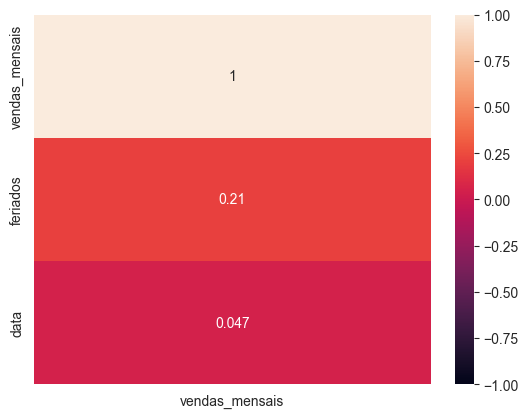

In [47]:
# Correlação entre as variáveis e o target
sns.heatmap(df_vendas_mensal.corr()[['vendas_mensais']].sort_values(by='vendas_mensais', ascending=False), annot=True, vmax=1, vmin=-1)

## Criação e treinamento do modelos de Regressão Linear

In [48]:
# Criação do modelo
X = df_vendas_mensal.drop(columns=['vendas_mensais'])
y = df_vendas_mensal['vendas_mensais']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

model = LinearRegression().fit(X_train, y_train)

In [49]:
# Gerar Predições do conjunto de teste com base no Modelo 1
y_pred = model.predict(X_test)

In [50]:
# R2 Score e MAE
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.042737228703477737
30943334.792113982


In [51]:
# Criação do modelo - apenas com Data x Vendas
X = pd.DataFrame(df_vendas_mensal['data'])
y = df_vendas_mensal['vendas_mensais']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

model = LinearRegression().fit(X_train, y_train)

In [52]:
# R2 Score e MAE
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

-0.013896254202314218
30361524.60077685


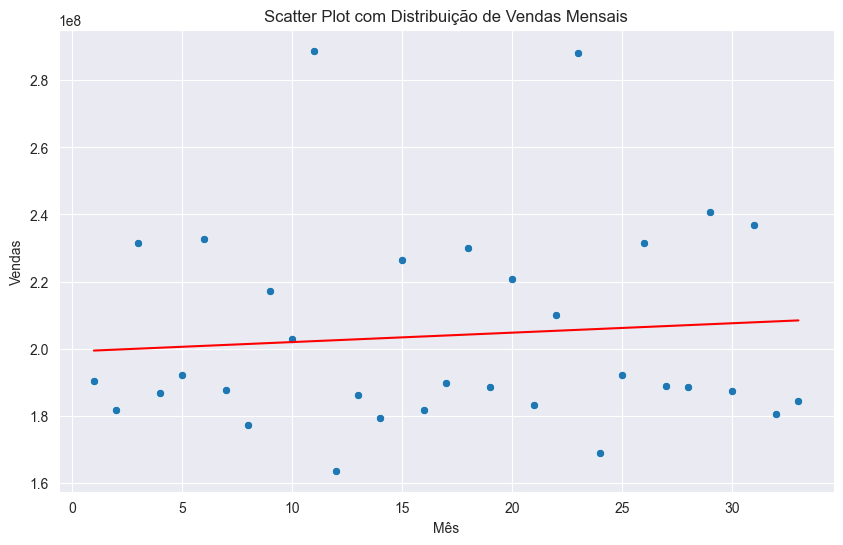

In [54]:
# Mostrar como a reta foi calculada
plt.figure(figsize=(10, 6))
sns.scatterplot(x='data', y='vendas_mensais', data=df_vendas_mensal)
plt.plot(df_vendas_mensal['data'], model.predict(df_vendas_mensal[['data']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

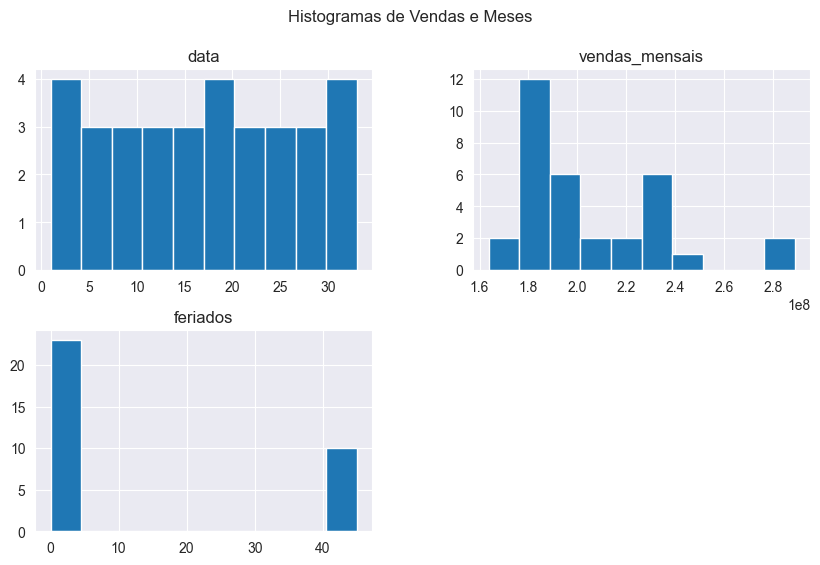

In [55]:
# Histograma de todas as variáveis
df_vendas_mensal.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()